In [1]:
#!/usr/bin/env python

"""hh.py: A variant of the Hodgkin-Huxley equations given in the paper 
"Ion channels enable electrical communication in bacterial communities" 
[http://www.nature.com/nature/journal/v527/n7576/full/nature15709.html]."""

__author__ = "Shahnawaz Ahmed"
__email__ = "shd339@gmail.com"

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint,ode
import numpy as np
import pandas as pd
import math
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
# Uncomment the following line to get plots in a seperate window 
%matplotlib inline

In [14]:
# define parameters for model
params = {
        'g_K'  :        30,       #min^-1,
        'g_L'  :        0.2,      #min^-1, 
        'V_K0' :       -380,      #mV,
        'V_L0' :       -156,      #mV,
        'S_th' :        40,
        'V_th' :       -150,
        'alpha_0' :     2,
        'beta' :        1.3,
        'm'    :        1,
        'F'    :        5.6,
        'sigma':        0.2,
    'delta_K'  :        1,
    'delta_L'  :        8,
    'gamma_s'  :        0.1,
    'gamma_e'  :        10,
    'gamma_t'  :        4,
    'alpha_s'  :        1,
    'alpha_t'  :        1,
    'D'        :        60*13.8*(10**(-2))*1000
}
# Define the value of e
e = math.exp(1)

In [15]:
def HodgkinHuxley(y0,t):
    V,n,S,E,T = y0
    
    V_k   = lambda E : params['V_K0'] + params['delta_K']*E
    V_l   = lambda E : params['V_L0'] + params['delta_L']*E    
    alpha = lambda S : (params['alpha_0']*(S**params['m'])) / (params['S_th']**params['m'] + S**params['m'])
    
    # all differential equations are wrt to time
    V_diff = lambda n,V : (-1)*params['g_K']*(n**4)*(V - V_k(E)) - params['g_L']*(V - V_l(E))
    n_diff = lambda S,n : alpha(S)*(1-n) - params['beta']*n
    # verify exp formula
    S_diff = lambda V,S : (params['alpha_s']*(params['V_th'] - V))/(e**((params['V_th'] - V)/params['sigma']) - 1 ) - params['gamma_s']*S                                         
    E_diff = lambda n,V,E : params['F']*params['g_K']*(n**4)*(V - V_k(E)) - params['gamma_e']*E
    T_diff = lambda V,T : params['alpha_t']*(params['V_L0'] - V) - params['gamma_t']*T
    
    return V_diff(n,V),n_diff(S,n),S_diff(V,S),E_diff(n,V,E),T_diff(V,T)

In [16]:
# initial values
V0 = -151.0
n0 = 0.10
S0 = 0
E0 = 200.0
T0 = 100

y0 = [V0,n0,S0,E0,T0]
# time interval spacing
h = 0.01
t_initial = 0
t_final = 60
t = np.arange(t_initial,t_final,h)

In [17]:
# Get the solutions, Note that each row gives values after one iteration
# Use X(:,i) i = 0,1,2 to access the membrane voltage, n, Stress value etc
X = odeint(HodgkinHuxley, y0, t )

In [18]:
# Put all the values in a Pandas Data frame and label the columns
sols = pd.DataFrame(X, columns=["V","n","S","E","T"])
sols.tail()

,V,n,S,E,T
5995,-156.003719,0.004175,0.100938,0.000001,0.000979
5996,-156.003712,0.004171,0.100837,0.000001,0.000977
5997,-156.003704,0.004167,0.100736,0.000001,0.000975
5998,-156.003697,0.004163,0.100635,0.000001,0.000973
5999,-156.003690,0.004159,0.100535,0.000001,0.000971


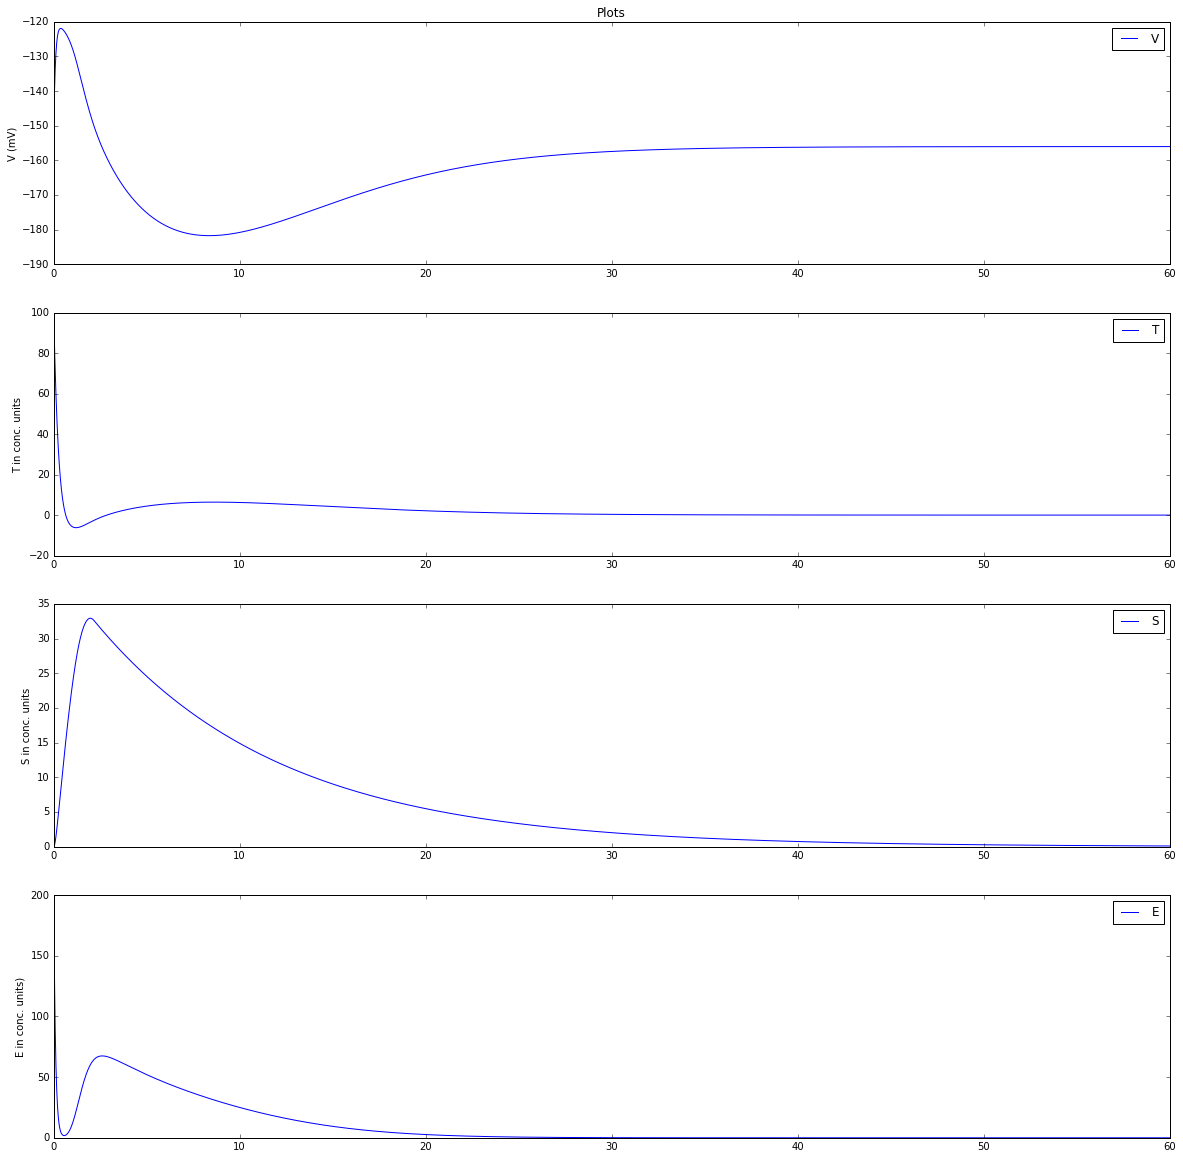

In [19]:
# We plot 4 variables V,T,S,E
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.title('Plots')

plt.subplot(4,1,1)
plt.plot(t, sols['V'])
plt.ylabel('V (mV)')
plt.legend()

plt.subplot(4,1,2)
plt.plot(t, sols['T'])
plt.ylabel('T in conc. units')
plt.legend()


plt.subplot(4,1,3)
plt.plot(t, sols['S'])
plt.ylabel('S in conc. units')
plt.legend()

plt.subplot(4,1,4)
plt.plot(t, sols['E'])
plt.ylabel('E in conc. units)')
plt.legend()
plt.show()

plt.close()

In [20]:
# Stable conditions 
V0 = -156.02
n0 = 0.000195
S0 = 0.0
E0 = 0.0
T0 = 10.00000

# Give the shock
E0 = 300
y0 = [V0,n0,S0,E0,T0]
# time interval spacing
h = .005
t_initial = 0
t_final = 60
t = np.arange(t_initial,t_final,h)
X = odeint(HodgkinHuxley, y0, t )

sols = pd.DataFrame(X, columns=["V","n","S","E","T"])
sols.head()

,V,n,S,E,T
0,-156.020000,0.000195,0.000000e+00,300.000000,10.000000
1,-153.680173,0.000194,2.212253e-11,285.368831,9.796226
2,-151.456797,0.000192,5.655583e-07,271.451229,9.585195
3,-149.344193,0.000191,8.177938e-04,258.212396,9.367614
4,-147.336954,0.000191,9.171719e-03,245.619229,9.144147


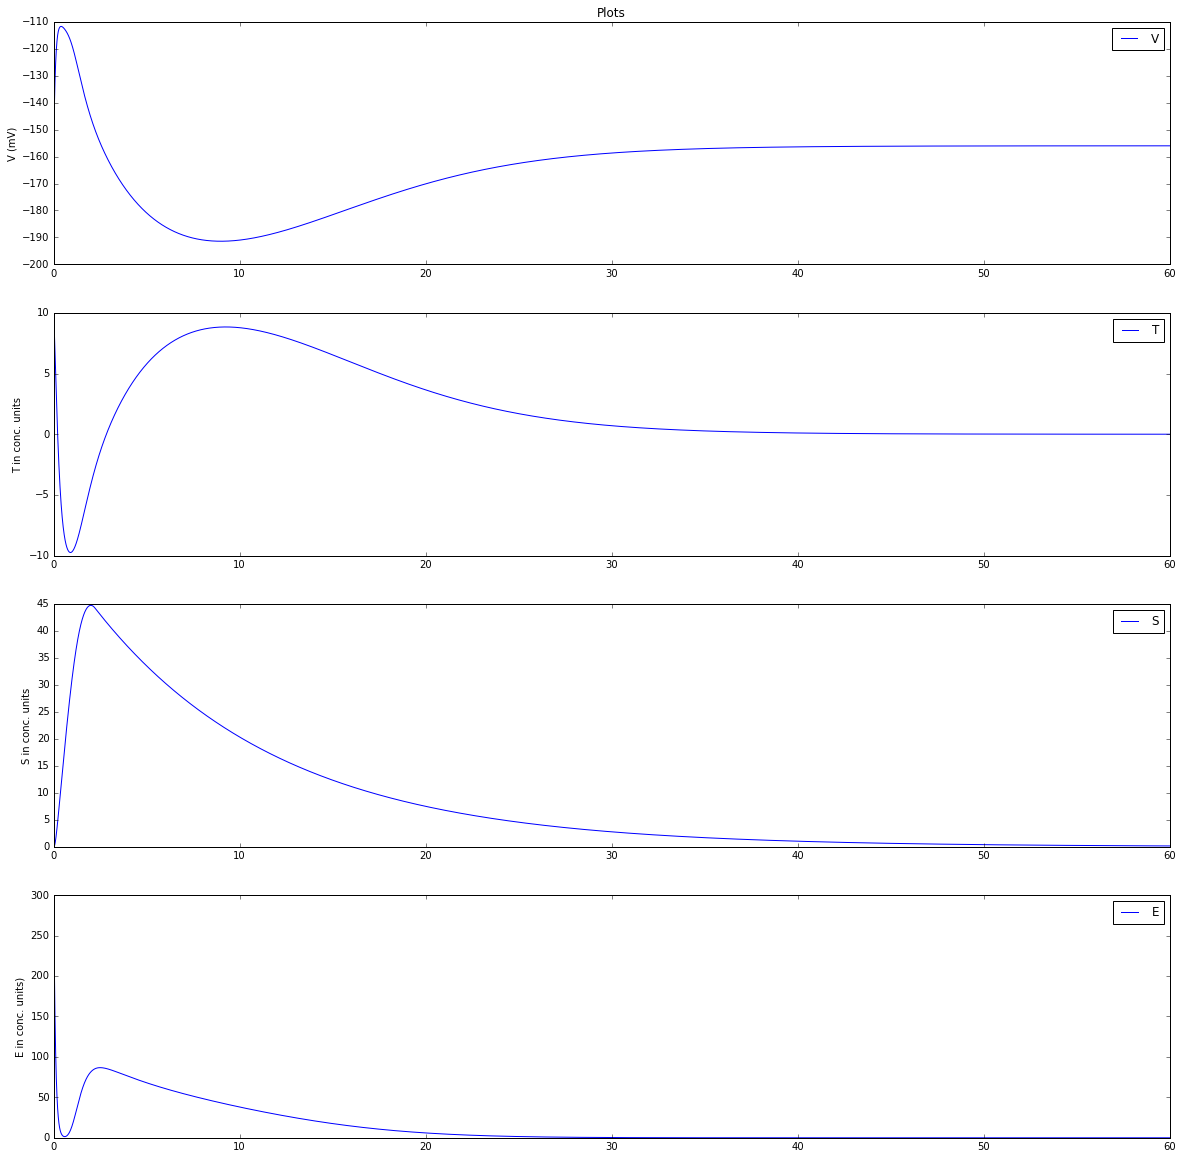

In [21]:
# We plot 4 variables V,T,S,E
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.title('Plots')

plt.subplot(4,1,1)
plt.plot(t, sols['V'])
plt.ylabel('V (mV)')
plt.legend()

plt.subplot(4,1,2)
plt.plot(t, sols['T'])
plt.ylabel('T in conc. units')
plt.legend()


plt.subplot(4,1,3)
plt.plot(t, sols['S'])
plt.ylabel('S in conc. units')
plt.legend()

plt.subplot(4,1,4)
plt.plot(t, sols['E'])
plt.ylabel('E in conc. units)')
plt.legend()
plt.show()

plt.close()

In [22]:
# Extending to space 
# 1D
dx = 15.0
L = 41*dx
Nx = int(L/dx)


T = 100.0  # total time
dt = 0.8*(dx**2)/(2*params["D"])
Nt = int(T/dt)

print (dx, dt, Nx, Nt)

x = np.arange(0,L,dx)
t = np.arange(0,T,dt)

15.0 0.010869565217391304 41 9200


In [23]:
# Giving an impulse

V = -156.003690 * np.ones([Nt,Nx])
n = 0.004159 * np.ones([Nt,Nx])
S = 0.100535 * np.ones([Nt,Nx])
E = 0.000001 * np.ones([Nt,Nx])
T = 0.000971 * np.ones([Nt,Nx])


S[0,1] = 50.0

In [24]:
for i in range(0,5000):
    for j in range(1,Nx-1):
        diffs = HodgkinHuxley([V[i,j],n[i,j],S[i,j], E[i,j],T[i,j]], 0)
        V[i+1,j] = V[i,j] + dt*(diffs[0])
        n[i+1,j] = n[i,j] + dt*(diffs[1])
        S[i+1,j] = S[i,j] + dt*(diffs[2])
        E[i+1,j] = E[i,j] + dt*(diffs[3]  + (1/dx**2)*params["D"]*(E[i,j-1] + E[i,j+1] - 2*E[i,j]))
        T[i+1,j] = T[i,j] + dt*(diffs[4])

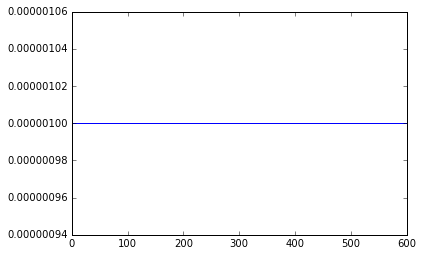

In [26]:
# Remove the matplotlib inline statement to see the animation
fig, ax = plt.subplots()

def animate(i):
    line = ax.plot(x, E[i,:])  # update the data
    return line


# Init only required for blitting to give a clean slate.
ani = animation.FuncAnimation(fig, animate,
                              interval=1, blit=True)
plt.show()
plt.close()

In [31]:
# Get some indices to plot so that fig is not cluttered
t1 = []
indices = []
for i in range(0,len(t), 25):
    indices += [i]
    t1.append(t[i])

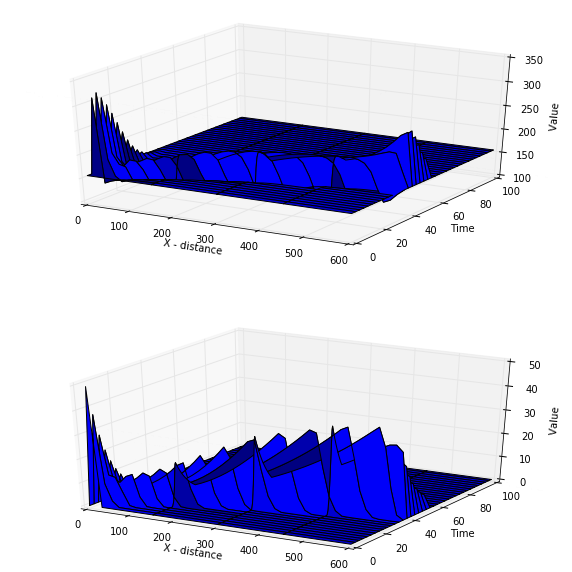

In [45]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(211, projection='3d')
X, Y = np.meshgrid(x, t1)
Z = -V[indices]
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X - distance ')
ax.set_ylabel('Time')
ax.set_zlabel('Value ')

ax = fig.add_subplot(212, projection='3d')
X, Y = np.meshgrid(x, t1)
Z = S[indices]
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X - distance ')
ax.set_ylabel('Time')
ax.set_zlabel('Value ')
plt.show()
plt.close()